In [1]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('GOOG', api_key=key)

C:\Users\User\AppData\Local\Temp\ipykernel_20296\1836431476.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOG', api_key=key)


In [4]:
df.to_csv('GOOG.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2019-01-29 00:00:00+00:00,1060.62,1075.150,1055.865,1072.68,1021819,53.0310,53.7575,52.79325,53.6340,20436380,0.0,1.0
1,GOOG,2019-01-30 00:00:00+00:00,1089.06,1091.000,1066.850,1068.43,1279822,54.4530,54.5500,53.34250,53.4215,25596440,0.0,1.0
2,GOOG,2019-01-31 00:00:00+00:00,1116.37,1117.330,1095.410,1103.00,1538324,55.8185,55.8665,54.77050,55.1500,30766480,0.0,1.0
3,GOOG,2019-02-01 00:00:00+00:00,1110.75,1125.000,1104.890,1112.40,1462208,55.5375,56.2500,55.24450,55.6200,29244160,0.0,1.0
4,GOOG,2019-02-04 00:00:00+00:00,1132.80,1132.800,1109.020,1112.66,2576470,56.6400,56.6400,55.45100,55.6330,51529400,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2024-01-22 00:00:00+00:00,147.71,150.015,147.580,148.71,21829232,147.7100,150.0150,147.58000,148.7100,21829232,0.0,1.0
1254,GOOG,2024-01-23 00:00:00+00:00,148.68,148.860,147.190,147.72,14113649,148.6800,148.8600,147.19000,147.7200,14113649,0.0,1.0
1255,GOOG,2024-01-24 00:00:00+00:00,150.35,151.570,149.840,150.29,18892741,150.3500,151.5700,149.84000,150.2900,18892741,0.0,1.0
1256,GOOG,2024-01-25 00:00:00+00:00,153.64,154.760,151.220,151.74,21495120,153.6400,154.7600,151.22000,151.7400,21495120,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df.shape

(1258, 14)

In [9]:
df[1228:].head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1228,GOOG,2023-12-13 00:00:00+00:00,133.97,134.780,132.95,134.545,25414461,133.97,134.780,132.95,134.545,25414461,0.0,1.0
1229,GOOG,2023-12-14 00:00:00+00:00,133.20,135.035,131.06,134.770,29619098,133.20,135.035,131.06,134.770,29619098,0.0,1.0
1230,GOOG,2023-12-15 00:00:00+00:00,133.84,134.830,132.63,132.920,58594004,133.84,134.830,132.63,132.920,58594004,0.0,1.0
1231,GOOG,2023-12-18 00:00:00+00:00,137.19,138.380,133.77,133.860,25699767,137.19,138.380,133.77,133.860,25699767,0.0,1.0
1232,GOOG,2023-12-19 00:00:00+00:00,138.10,138.770,137.45,138.000,20601632,138.10,138.770,137.45,138.000,20601632,0.0,1.0


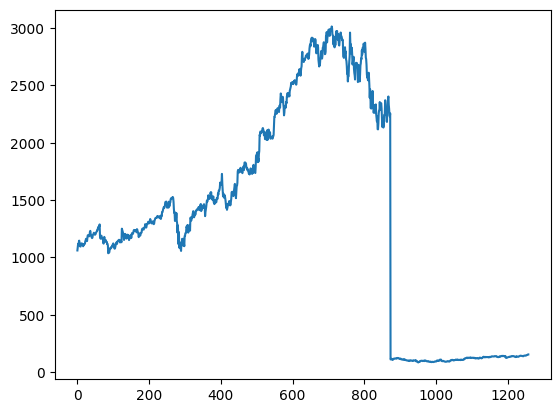

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data , so we apply MiniMax scaler

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1258, 1)

In [14]:
df1

array([[0.33341295],
       [0.34311715],
       [0.35243577],
       ...,
       [0.02281374],
       [0.02393634],
       [0.02398753]])

                           SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [15]:
from sklearn.model_selection import train_test_split
training_set = int(len(df1)*0.65)
test_set = len(df1) - training_set
train_data , test_data = df1[0:training_set,:] , df1[training_set:len(df1):]

In [16]:
import numpy 
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [17]:
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [18]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape) , print(y_test.shape)

(340, 100)
(340,)


(None, None)

X_train =X_train.reshape(X_train.shape[0] , X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0] , X_test.shape[1],1)

                                         STACK LSTM MODEL

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

                                          OPTIMIZERS

SGD(stochastic gradient descent) : update model weights based on the gradients of the loss function 


Adam : combination of both ADAGRAD and RMSprop


RMSprop : utilizes the moving average of squared gradients for normalizing the gradient descent 

Adadelta : extension of AdaGrad that adapts learning rates based on a fixed-size window of previous gradient updates.


Adamax: A variant of Adam based on the infinity norm.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100

12/12 [==============================] - 10s 275ms/step - loss: 0.1822 - val_loss: 0.0286
Epoch 2/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0162 - val_loss: 0.0279
Epoch 3/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0083 - val_loss: 0.0145
Epoch 4/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0039 - val_loss: 0.0108
Epoch 5/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0020 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 1s 125ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 7/100
12/12 [==============================] - 2s 145ms/step - loss: 9.0223e-04 - val_loss: 0.0015
Epoch 8/100
12/12 [==============================] - 2s 129ms/step - loss: 9.0571e-04 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 2s 129ms/step - loss: 9.3134e-04 - val_loss: 0.0018
Epoch 10/100
12/12 [==============================] - 2s 134ms/step - loss: 9

Epoch 75/100
12/12 [==============================] - 2s 142ms/step - loss: 6.9092e-04 - val_loss: 4.3214e-05
Epoch 76/100
12/12 [==============================] - 2s 130ms/step - loss: 6.5201e-04 - val_loss: 5.2791e-05
Epoch 77/100
12/12 [==============================] - 1s 123ms/step - loss: 6.7315e-04 - val_loss: 4.7665e-05
Epoch 78/100
12/12 [==============================] - 1s 122ms/step - loss: 6.6210e-04 - val_loss: 3.5424e-05
Epoch 79/100
12/12 [==============================] - 2s 137ms/step - loss: 8.3310e-04 - val_loss: 3.2327e-05
Epoch 80/100
12/12 [==============================] - 2s 143ms/step - loss: 6.1155e-04 - val_loss: 2.1424e-05
Epoch 81/100
12/12 [==============================] - 2s 134ms/step - loss: 6.3814e-04 - val_loss: 2.5778e-05
Epoch 82/100
12/12 [==============================] - 2s 147ms/step - loss: 5.8258e-04 - val_loss: 1.9120e-05
Epoch 83/100
12/12 [==============================] - 1s 123ms/step - loss: 6.8169e-04 - val_loss: 8.1704e-05
Epoch 84/1

In [24]:
import tensorflow as tf

In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 26ms/step


In [26]:
# transform the data present to its original form - reverse sacling of the data present

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


ROOT MEAN SQUARED PERFORMANCE MATRIX

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

2026.3874205371856

In [28]:
math.sqrt(mean_squared_error(y_test , test_predict))

135.29084231465887

                                              PLOT

Blue - The original data of the dataset

Yellow - Training dataset

Green - Test dataset


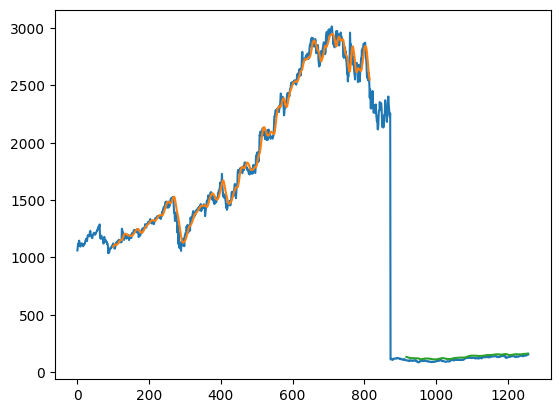

In [29]:
look_back = 100


trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:] = np.nan
testPredictPlot = np.empty_like(df1)
testPredictPlot[:] = np.nan


trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [30]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
x_input = test_data[341:].reshape(1,-1)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.018159546045470525,
 0.017702315836884832,
 0.0179855255929491,
 0.01832674216652051,
 0.018510999116249077,
 0.017941167438384812,
 0.018429107138591933,
 0.018937519833213342,
 0.018702080397449066,
 0.0189272833360062,
 0.018882925181441915,
 0.017436166909499128,
 0.01633403737686347,
 0.016296503553770613,
 0.016610422801456307,
 0.01568231372134207,
 0.01636815903422061,
 0.016937990712084867,
 0.01650123349791346,
 0.01763407252217054,
 0.01699599752959201,
 0.018009410753099104,
 0.01791387011249911,
 0.01884880352408477,
 0.019111540285734755,
 0.01900917531366333,
 0.019862216747591862,
 0.01938110137885617,
 0.01879762103804906,
 0.019449344693570455,
 0.019619952980356164,
 0.019036472639549048,
 0.018934107667477617,
 0.018169782542677666,
 0.018565593768020503,
 0.019323094561349032,
 0.01473373164681355,
 0.013631602114177886,
 0.013617953451235034,
 0.01441981239912785,
 0.014266264941020717,
 0.015040826563027816,
 0.015385455302334951,
 0.01599623296902777,
 0.0163

In [35]:
from numpy import array

def predict_stock_prices(model, initial_input, time_steps=100, prediction_days=30):
    lst_output = []
    temp_input = initial_input  # Assuming initial_input contains the stock data
    n_steps = time_steps
    i = 0
    
    while i < prediction_days:
        if len(temp_input) > time_steps:
            x_input = array(temp_input[1:]).reshape(1, -1, 1)
        else:
            x_input = temp_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input = np.append(temp_input, yhat[0])
        lst_output.extend(yhat.tolist())
        i += 1
    
    return lst_output

# Example usage
# Assuming 'model' is your trained model and 'stock_data' is the initial stock data
# predicted_prices = predict_stock_prices(model, stock_data, time_steps, prediction_days)


In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df1)

1258

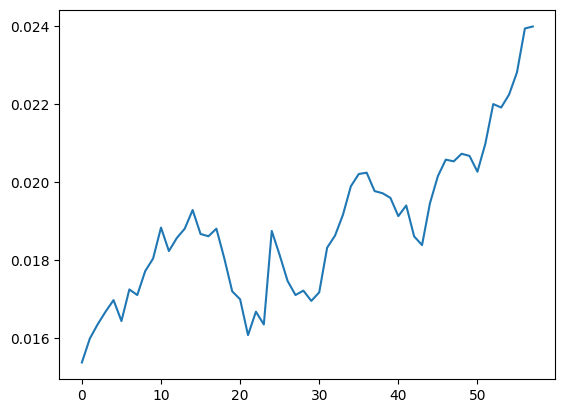

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

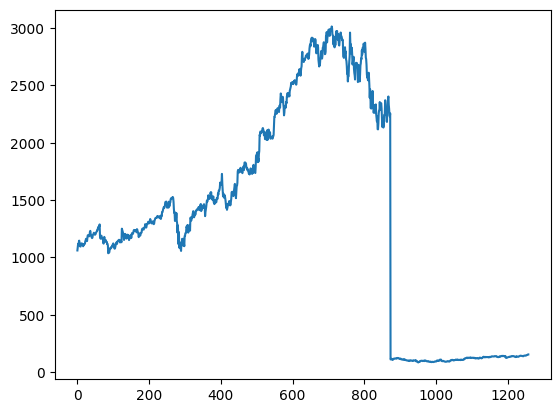

In [41]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)